### Notebook 2. Network with a hidden layer

Aim is to extend the model of notebook 1 to a neural network with one hidden layer. 
* The matricies $\mathbf{X}$, $\mathbf{\tilde{X}}$, $\mathbf{T}$ are generated as for the simple input-output network and $\mathbf{P}$ will denote the prediction matrix.
* The hidden layer has $n_h$ units as well as a bias. The matrix of its values for all samples is $\mathbf{H}$ with dimension $(n_s,n_h)$. An additional matrix $\mathbf{\tilde{H}}$ is defined that includes the bias as a column of ones, and has dimension $(n_s,n_h+1)$. 
* The matrix of weights $\mathbf{w}$ between layers $\tilde{X}$ and $H$ has dimensions $(3,n_h)$
* The matrix of weights $\mathbf{v}$ between layers $\tilde{H}$ and $P$ has dimensions $(n_h+1,1)$.
* The non-linearities are again given by sigmoidal activations of the linear input $z$ so that $f(z)=1/(1+\exp(-z))$. The prediction of the network can therefore be written in matrix form as
$$
f(\tilde{\mathbf{X}}\mathbf{w})=\mathbf{H}~~\mbox{ and} ~~f(\tilde{\mathbf{H}}\mathbf{v})=\mathbf{P}.
$$
* The cost function is the same as the previous case
$$C=-\frac{1}{n_s}\sum_s\left[T_s\log(P_s)+(1-T_s)\log(1-P_s)\right].$$

In [28]:
# libraries required for plotting and maths
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Q1 Generate the x,y data
* This time the data will not be separable by a straight line. 
* Consider two circles centred at (0.3,0.3) and (-0.5,0.5) both of radius 0.3.
* Generate $n_s=400$ points on the plane distributed as in the previous case.
* If the points fall within either circle they are assigned $t=1$, otherwise $t=0$.
* Generate the matricies $\mathbf{X}$ and $\mathbf{T}$ and plot out the scatter of data points.

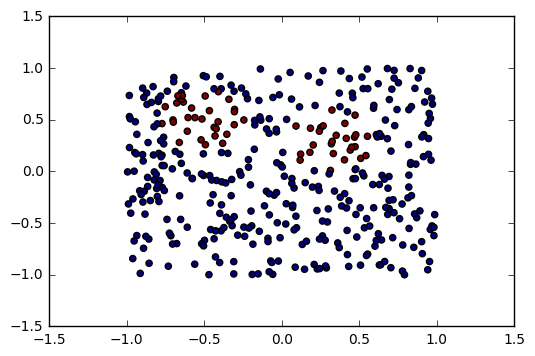

In [54]:
import matplotlib.patches as patches
ns = 400
#fig1 = plt.figure()
#ax1 = fig1.add_subplot(111, aspect='equal')
#ax1.add_patch(patches.Circle((0.3, 0.3),0.3,fill=False))
#ax1.add_patch(patches.Circle((-0.5, 0.5),0.3,fill = False))

x=2 * np.random.rand(ns,1) -1
y=2 *np.random.rand(ns,1) -1

X=np.column_stack([x,y])

#plt.subplot(121)
#plt.plot(x,y,".")
#plt.title("y=x^2")
#plt.xlabel("x")
#plt.ylabel("y")
#ptsA = np.around(np.random.rand(ns, 2), decimals =3)

def in_circle(x,y):
    if (x-0.3)**2+(y-0.3)**2<0.09:
        return 1
    if (x+0.5)**2+(y-0.5)**2<0.09:
        return 1
    return 0
T=np.array([in_circle(X[i,0],X[i,1]) for i in range(ns)])
#print(T)
#T = (X[:,1]>(m*X[:,0]+κ))
#T = T[:,None]

plt.scatter(X[:,0], X[:,1],c=T)

#plt.axis([-1,1,-1,1])


### Q2 Write a function that calculates a prediction and cost for a given set of weights
* The input-to-output transformations are $$ f(\tilde{\mathbf{X}}\mathbf{w})=\mathbf{H}~~\mbox{ and} ~~f(\tilde{\mathbf{H}}\mathbf{v})=\mathbf{P}$$ 
where $f(z)=1/(1+e^{-z})$.
* The cost function is the same as before 
$$C=-\frac{1}{n_s}\sum_s\left[T_s\log(P_s)+(1-T_s)\log(1-P_s)\right]$$
* Creat a function that takes $\tilde{\mathbf{X}}$, $\mathbf{w}$, $\mathbf{v}$ and $\mathbf{T}$ as inputs, and then outputs the hidden layer $\mathbf{\tilde{H}}$, prediction matrix $\mathbf{P}$ and cost $C$.

In [ ]:
def predict(Xb, w, v):
    assert Xb.shape[1]==w.shape[0]
    ns=Xb.shape[0]
    Z=np.matmul(Xb,w)
    H=1./(1+np.exp(-Z))
    H=1./(1+np.exp(-Z))

    return P

def cost(P, T):
    C = -np.sum(T*np.log(P)+(1-T)*np.log(1-P))/ns
    return C

### Q3 Write a function that calculates the weight gradients
* Using similar arguments to the simple input-output network show that
$$ \frac{dc}{dv_j}=\tilde{h}_j\delta^p~~~\mbox{ so that in matrix form}~~~ 
\frac{dC}{d\mathbf{v}}=\frac{1}{n_s}\tilde{\mathbf{H}}'\Delta^p
$$
is the gradient for the $\mathbf{v}$ weights, where $\delta^p=(p-t)$ and $\Delta^p_s$ is a matrix of dimension $(n_s,1)$. 
* Show that the cost gradient for $\mathbf{w}$ for a data point obeys
$$
\frac{dc}{dw_{ij}}=\frac{dc}{dp}\frac{dp}{dz^p}\frac{dz^p}{dh_j}\frac{dh_j}{dw_{ij}}=\tilde{x}_i\delta^h_j ~~~\mbox{ where }~~~\delta_j^h=h_j(1-h_j)\delta^pv_j~~~\mbox{ and $j$ runs from 1 to $n_h$}
$$
* This gives the gradient for the $\mathbf{w}$ weights as
$$
\frac{dC}{d\mathbf{w}}=\frac{1}{n_s}\tilde{\mathbf{X}}'\Delta^h
$$
where the $(n_s,n_h)$ dimensional matrix $\Delta^h$ has entries that are
$$
\Delta^h_{sj}=H_{sj}(1-H_{sj})[\Delta_s^pv_j]
$$
* Write a function that takes in $\mathbf{\tilde{X}}$, $\mathbf{\tilde{H}}$, $\mathbf{v}$, $\mathbf{P}$ and $\mathbf{T}$ and outputs $dC/d\mathbf{w}$ and $dC/d\mathbf{v}$.

### Q4 Gradient descent for the weights
* Write a loop that does $n$ iterations of the gradient descent, where for each one the weight matricies are updated 
$$ \mathbf{w}_\mathrm{new}=\mathbf{w}_\mathrm{old}-\alpha\frac{dC}{d\mathbf{w}} 
~~~\mbox{ and }~~~
\mathbf{v}_\mathrm{new}=\mathbf{v}_\mathrm{old}-\alpha\frac{dC}{d\mathbf{v}} 
$$ where $\alpha$ is a positive learning rate that you can choose.
* Plot a graph of the cost $C$ as a function of the iteration steps and check that it is monotonically decreasing.
* How does the cost vary with different choices of $n_h$?
* What is the percentage of correctly classified data points in each case?

### Q5 Plotting the classifier and hidden layers

This data is not linearly separable; however, you can interpret the weights coming into the hidden layer as defining $n_h$ lines, like was done for the simple input-output case in notebook 1. 
* Plot the $n_h$ lines represented by the weight matrix $\mathbf{w}$ to gain insight into the role of the hidden layer.
* Plot a grid of points on the plane that are colour coded by the predictions. This can be achieved by using one of the previous functions. 

### Q6 Comparison with a test set of data
An additional question if you have time.
* Generate a test set of data and compare the classification of the already trained network with those data.
* How do the percentages of training (first set) and test set vary as you increase the number of hidden units?